In [1]:
import pandas as pd
car = pd.read_csv('Car_Insurance_Claim.csv')

In [2]:
import numpy as np

def clean():
	car.replace('none', np.NaN, inplace=True)
	car.drop(columns='Unnamed: 0', inplace=True)

	car['CREDIT_SCORE'] = pd.to_numeric(car['CREDIT_SCORE'], errors='coerce')
	car['ANNUAL_MILEAGE'] = pd.to_numeric(car['ANNUAL_MILEAGE'], errors='coerce')

	categorical_columns = [
		'AGE', 'INCOME', 'VEHICLE_YEAR', 'GENDER', 'RACE',
		'DRIVING_EXPERIENCE', 'EDUCATION', 'VEHICLE_OWNERSHIP', 'MARRIED', 
		'CHILDREN', 'POSTAL_CODE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 
		'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'
	]
	
	for col in categorical_columns:
		car[col] = car[col].astype('category')

	return car

clean()


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,NaN,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,NaN,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,NaN,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [3]:
car.describe()
print("Mean:\n", car.mean(numeric_only=True))  
print("Mode:\n", car.select_dtypes(include='category').mode().iloc[0]) 

Mean:
 ID                500521.906800
CREDIT_SCORE           0.515816
ANNUAL_MILEAGE     11698.435754
dtype: float64
Mode:
 AGE                          26-39
GENDER                      female
RACE                      majority
DRIVING_EXPERIENCE            0-9y
EDUCATION              high school
INCOME                 upper class
VEHICLE_OWNERSHIP              1.0
VEHICLE_YEAR           before 2015
MARRIED                        0.0
CHILDREN                       1.0
POSTAL_CODE                  10238
VEHICLE_TYPE                 sedan
SPEEDING_VIOLATIONS              0
DUIS                             0
PAST_ACCIDENTS                   0
OUTCOME                        0.0
Name: 0, dtype: object


In [4]:
#for more detailed data (analyzing each categoey):
print(car['GENDER'].value_counts())  
print(car['EDUCATION'].value_counts()) 
print(car['RACE'].value_counts())
print(car['INCOME'].value_counts())
print(car['VEHICLE_YEAR'].value_counts())
print(car['VEHICLE_TYPE'].value_counts())


GENDER
female    4968
male      4933
Name: count, dtype: int64
EDUCATION
high school    4116
university     3888
Name: count, dtype: int64
RACE
majority    8919
minority     982
Name: count, dtype: int64
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64
VEHICLE_YEAR
before 2015    6896
after 2015     3004
Name: count, dtype: int64
VEHICLE_TYPE
sedan         9432
sports car     469
Name: count, dtype: int64


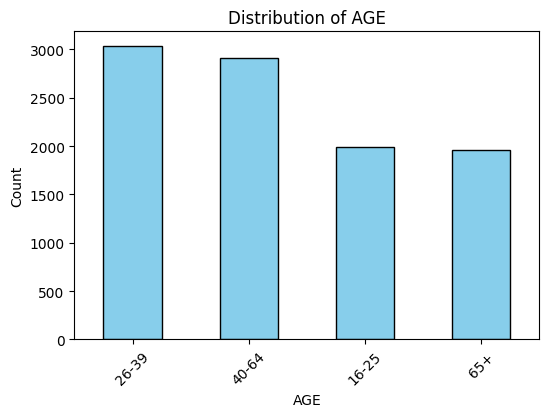

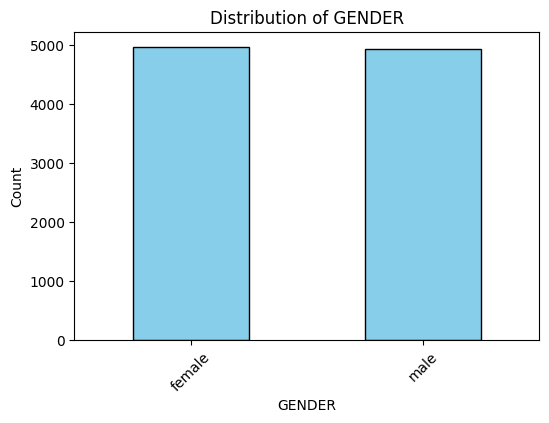

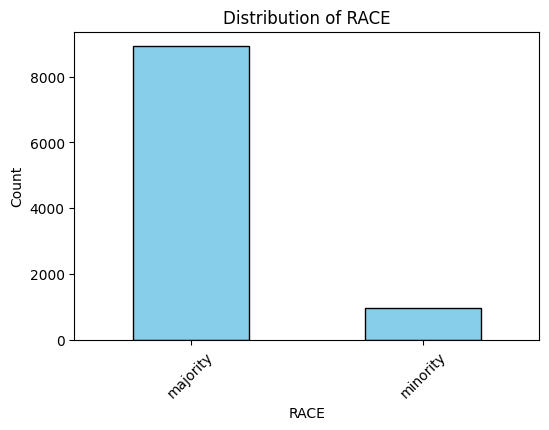

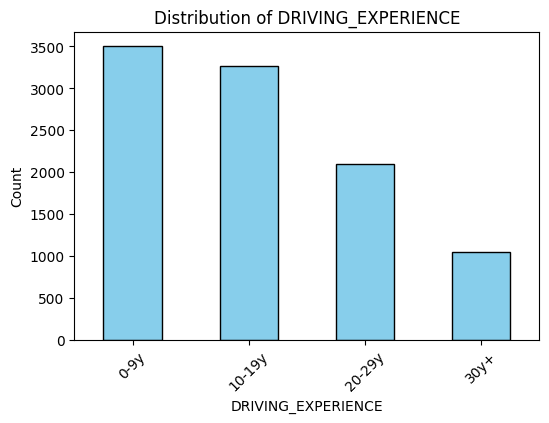

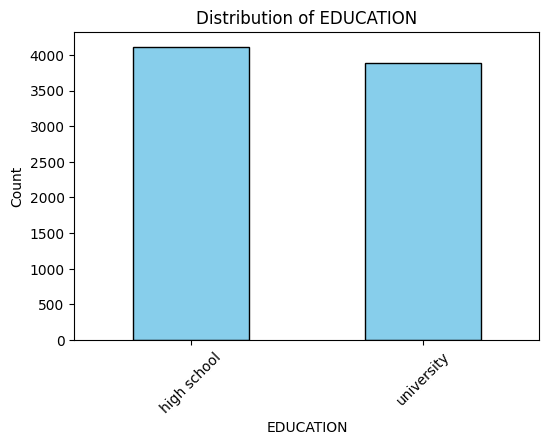

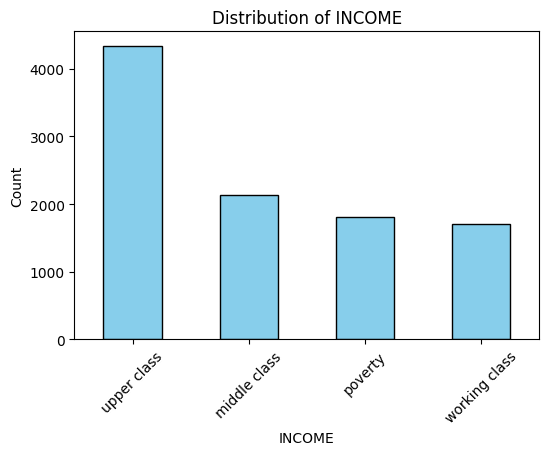

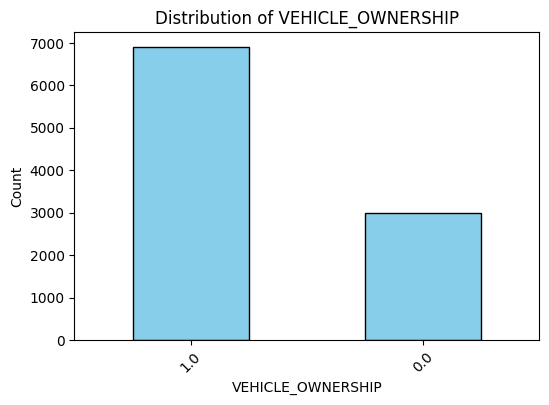

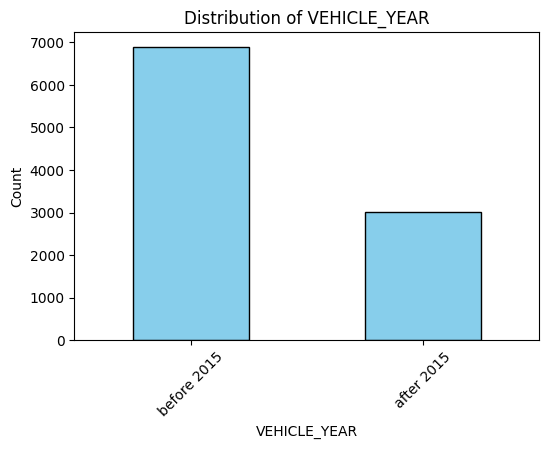

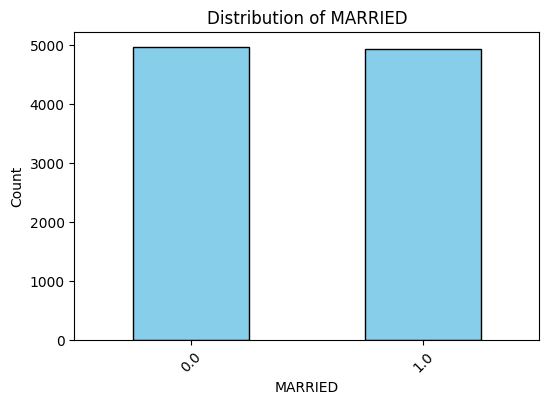

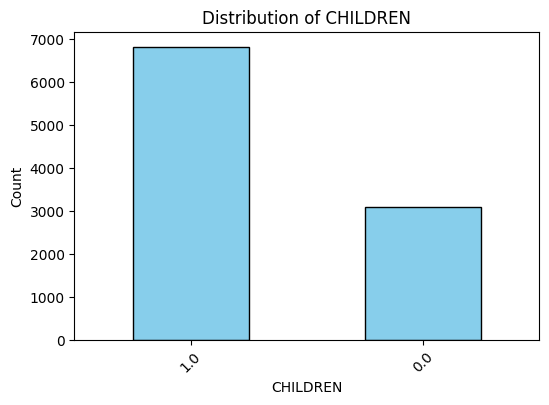

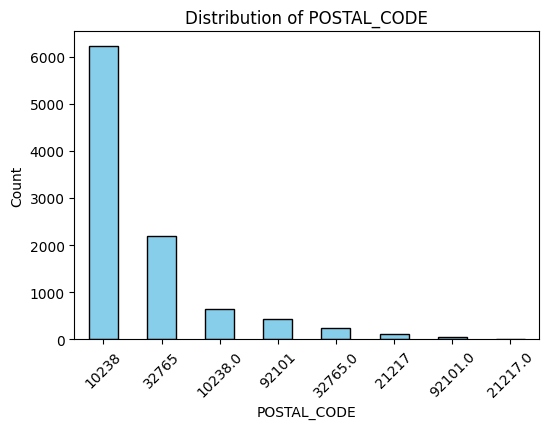

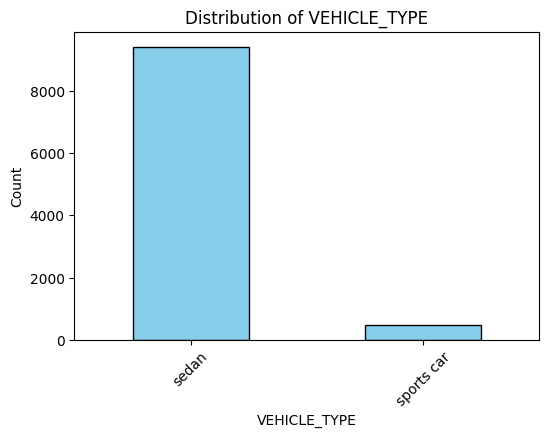

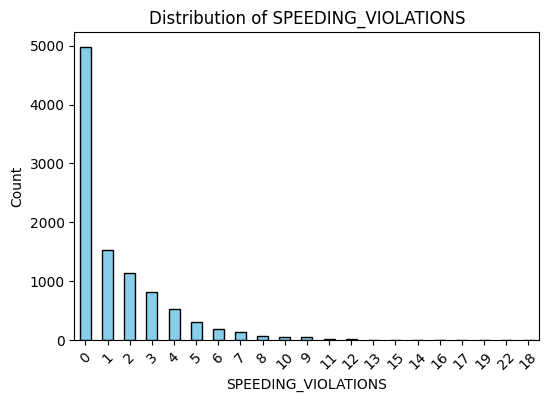

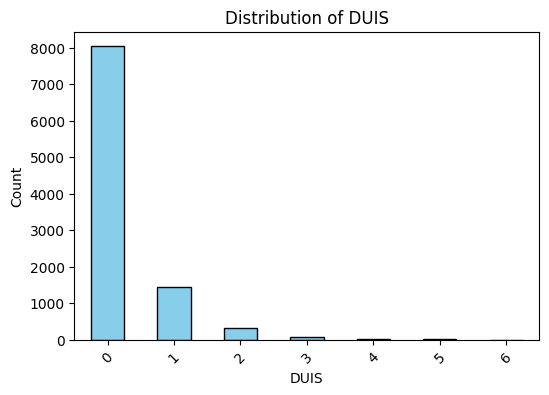

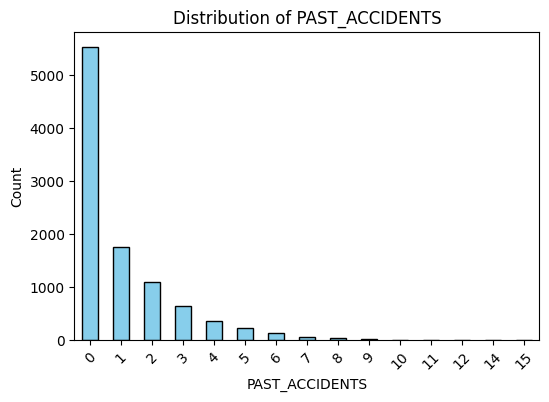

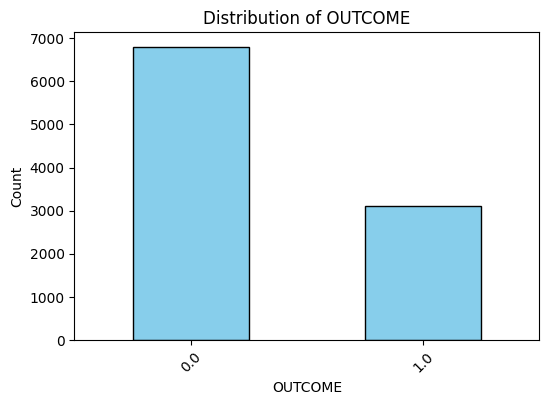

In [5]:
import matplotlib.pyplot as plt
def vizualize():
	categorical_cols = car.select_dtypes(include='category').columns

	for col in categorical_cols:
		plt.figure(figsize=(6, 4))
		car[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
		plt.title(f'Distribution of {col}')
		plt.xlabel(col)
		plt.ylabel('Count')
		plt.xticks(rotation=45)
		plt.show()

vizualize()

In [6]:
#Conclusion
#Car insurance company should consider the following statistics:
#  - the dataset consists primarily of young to middle-aged drivers with high school or university education
# - most drivers belong to the upper-class income group and have 0-19 or 10-19 driving expirience
# - the majority drive older sedans, which could indicate cost-conscious purchasing behavior
# - a safe driving pattern is observed, with low instances of accidents, DUIs, and speeding violations
#The low claim rate suggests either good driving habits, or strict claim approval processes